<h1 style="border: thick double #32a1ce; text-align:center;border-radius:35px">
Projet Python pour la data science
</h1>

<h1 style="text-align: center"> 
Prérequis 
</h1>

In [25]:
# Librairies standards
import zipfile
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from math import radians, cos, sin, asin, sqrt
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

In [26]:
# Définition du répertoire de travail
HOME_DIR = Path.cwd().parent
DATA_DIR = Path(HOME_DIR, "data")
print(f"Work directory: {HOME_DIR} \nData directory: {DATA_DIR}")

Work directory: c:\Users\HP\Documents\Cours 2AD ENSAE\Semestre 1\Python pour data science\indice de l'air\projet-Python\projet 
Data directory: c:\Users\HP\Documents\Cours 2AD ENSAE\Semestre 1\Python pour data science\indice de l'air\projet-Python\projet\data


<h1 style=" text-align:center">
1.Description des données 
</h1>

<h2 style=" text-align:left">
1.1- Chargement des bases 
</h2>

Dans le cadre de notre travail nous allons utiliser 05 bases de données qui porte essentiellement sur: 
   dans cette partie il est question de chargé et visualiser nos  differentes  bases de données.

<h3 style=" text-align:left">
a. Données sur la qualité de l'air  
</h3>

In [27]:
qualite_air = pd.read_csv(Path(DATA_DIR, "indices_QA_commune_IDF_2017.csv"), sep=",")
qualite_air.head(5)

,date,ninsee,no2,o3,pm10
0,01/01/2017,0,23,16,43
1,01/01/2017,75,23,8,38
2,01/01/2017,77,19,17,44
3,01/01/2017,78,16,15,32
4,01/01/2017,91,14,16,34


Cette base de 

In [28]:
qualite_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476485 entries, 0 to 476484
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    476485 non-null  object
 1   ninsee  476485 non-null  int64 
 2   no2     476485 non-null  int64 
 3   o3      476485 non-null  int64 
 4   pm10    476485 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 18.2+ MB


Description : Notre  base ne contient aucune valeur manquante. 

Variable : 
<ul>
    <li> date : La date de mesure de la qualité de l’air.</li>
    <li>ninsee: code postale des département de l'ile de France. Le code INSEE de la commune ou de l’arrondissement parisien.</li>
    <li>NO2 (dioxyde d’azote) : Mesuré en µg/m³, ce polluant provient principalement des émissions des véhicules et des processus industriels. Il est un indicateur important de la pollution de l’air en milieu urbain.</li>
    <li> O3 (ozone) : Mesuré en µg/m³, l’ozone troposphérique est un polluant secondaire formé par des réactions chimiques entre d’autres polluants (comme les NOx et les COV) sous l’effet de la lumière solaire. Il est souvent plus présent en été.</li>
    <li> PM10 (particules fines) : Mesuré en µg/m³, ce sont des particules en suspension dans l’air dont le diamètre est inférieur à 10 micromètres. Elles proviennent de diverses sources, y compris les émissions des véhicules, les industries, et les activités de construction.</li>
</ul>



In [29]:
quali_air=qualite_air.copy()
var=['no2', 'o3', 'pm10']
quali_air['dept']= qualite_air['ninsee'].astype(str).str[:2].astype(int)


quali_air=quali_air.groupby('dept')[var].mean().reset_index()
vars=['dept','no2', 'o3', 'pm10']
quali_air=round(quali_air[vars],2)
quali_air.head()

,dept,no2,o3,pm10
0,0,37.89,35.77,36.33
1,75,32.50,28.17,33.52
2,77,15.03,31.92,26.75
3,78,17.17,31.91,24.82
4,91,17.32,32.16,25.00



Analyse de la variable quantitative : no2
count    476485.000000
mean         18.016225
std           9.368416
min           1.000000
25%          11.000000
50%          15.000000
75%          23.000000
max          64.000000
Name: no2, dtype: float64


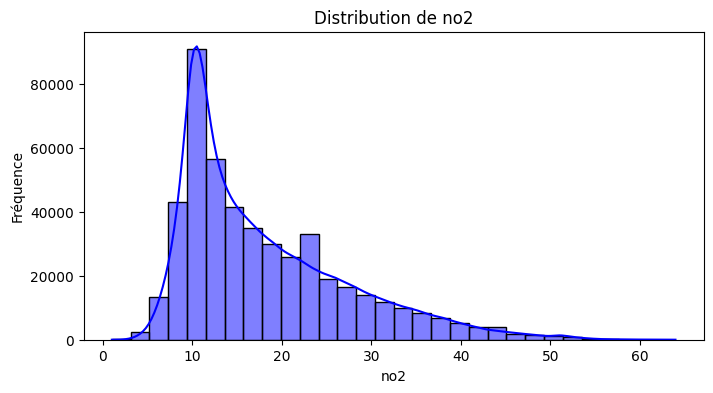


Analyse de la variable quantitative : o3
count    476485.000000
mean         31.834522
std          10.959234
min           1.000000
25%          25.000000
50%          31.000000
75%          38.000000
max          97.000000
Name: o3, dtype: float64


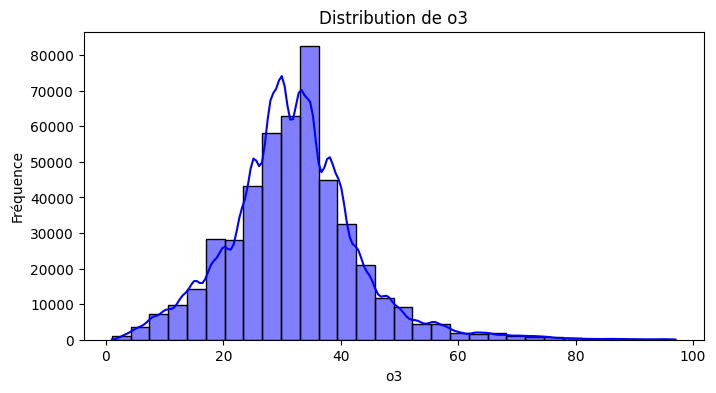


Analyse de la variable quantitative : pm10
count    476485.000000
mean         26.724308
std          14.170604
min           2.000000
25%          17.000000
50%          24.000000
75%          32.000000
max          99.000000
Name: pm10, dtype: float64


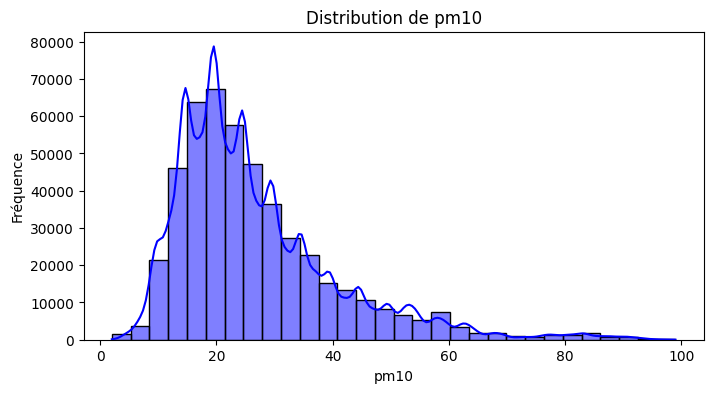

In [30]:
quantitative_vars = ['no2', 'o3', 'pm10']

for col in quantitative_vars:
    print(f"\nAnalyse de la variable quantitative : {col}")
    print(qualite_air[col].describe())
    
    # Histogramme
    plt.figure(figsize=(8, 4))
    sns.histplot(qualite_air[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()


In [31]:
# Pour chaque variable qualitative
qualitative_vars = ['date', 'ninsee']
for var in qualitative_vars:
    print(f"Résumé pour la variable '{var}':")
    freq_abs = qualite_air[var].value_counts()
    freq_rel = qualite_air[var].value_counts(normalize=True) * 100
    summary = pd.DataFrame({"Fréquence absolue": freq_abs, "Fréquence relative (%)": freq_rel})
    print(summary)
    print("\n")


Résumé pour la variable 'date':
            Fréquence absolue  Fréquence relative (%)
date                                                 
01/01/2017               1309                0.274720
08/09/2017               1309                0.274720
06/09/2017               1309                0.274720
05/09/2017               1309                0.274720
04/09/2017               1309                0.274720
...                       ...                     ...
29/04/2017               1309                0.274720
28/04/2017               1309                0.274720
27/04/2017               1309                0.274720
31/12/2017               1309                0.274720
27/09/2017                  9                0.001889

[365 rows x 2 columns]


Résumé pour la variable 'ninsee':
        Fréquence absolue  Fréquence relative (%)
ninsee                                           
0                     365                0.076603
77                    365                0.076603
78    

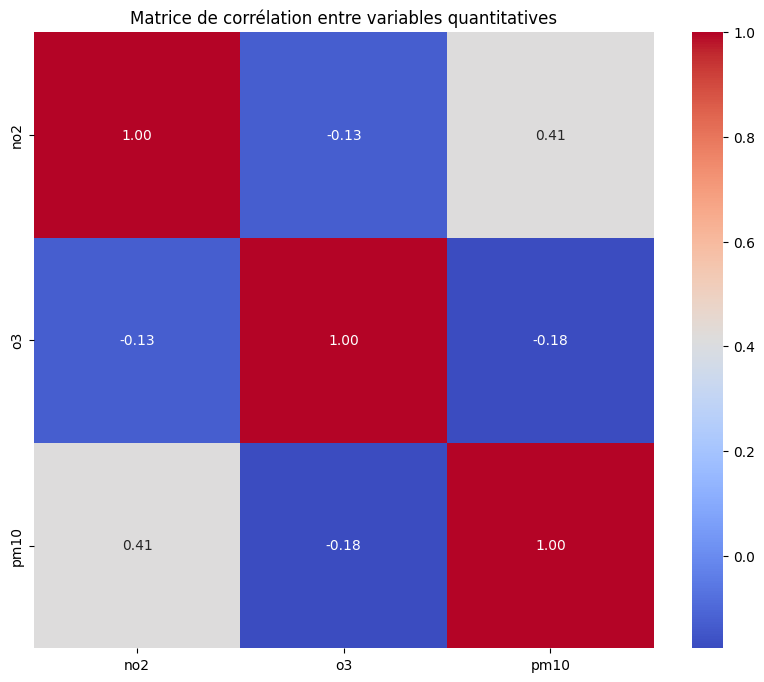

In [32]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
corr_matrix = qualite_air[quantitative_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre variables quantitatives")
plt.show()


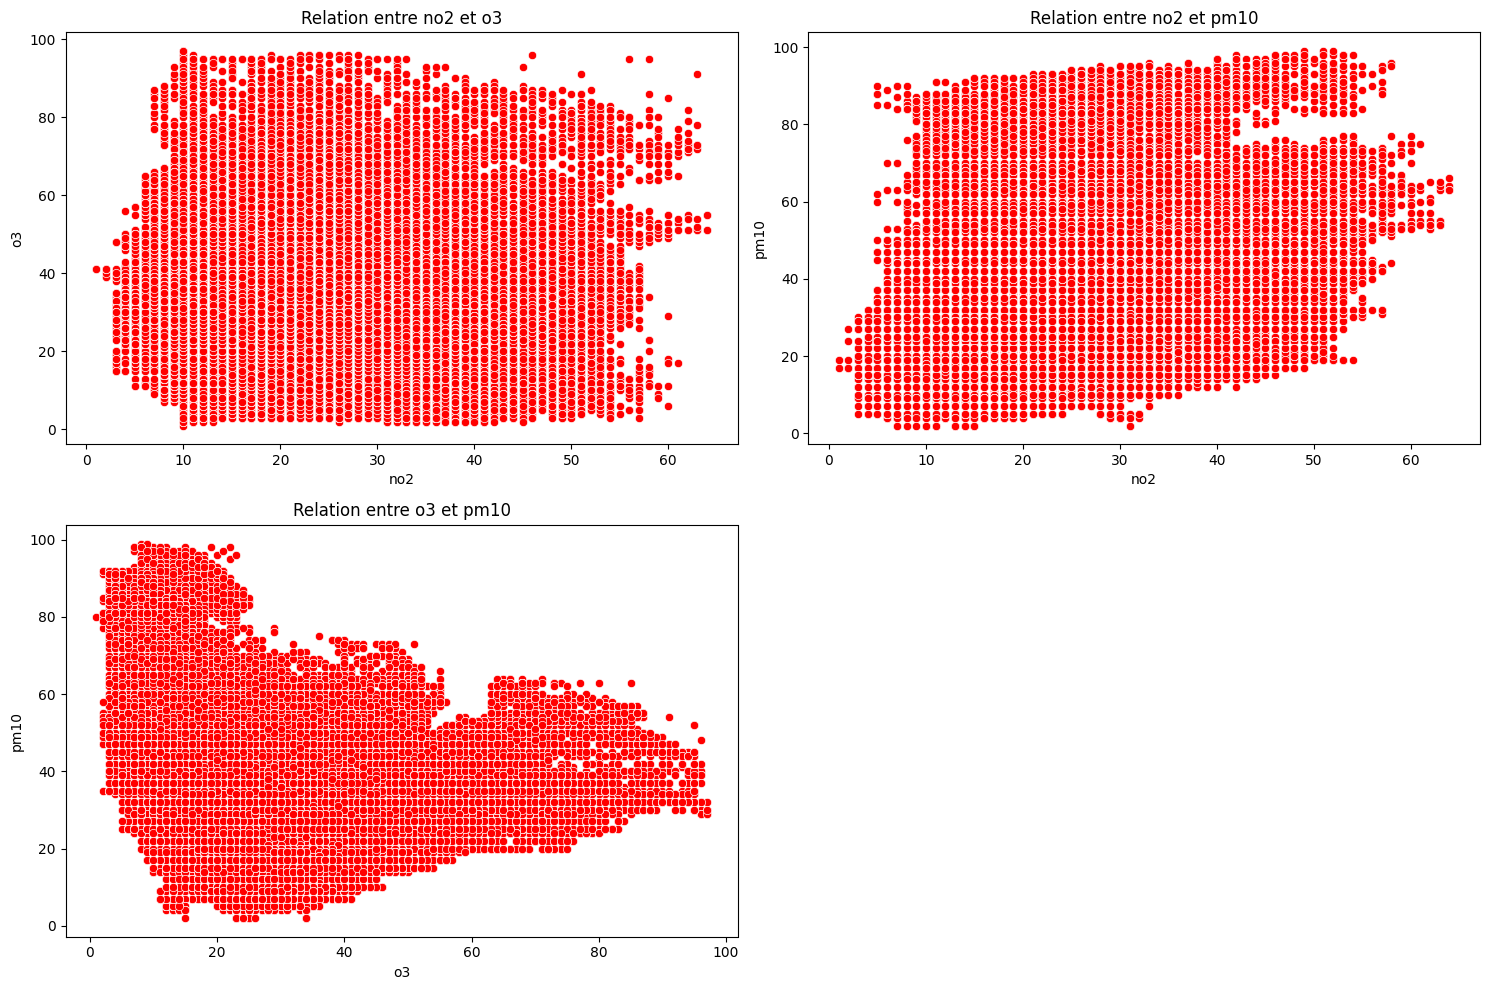

In [33]:
# Liste des variables quantitatives
quantitative_vars = ['no2', 'o3', 'pm10']

# Création de nuages de points pour chaque paire de variables
plt.figure(figsize=(15, 10)) 
plot_number = 1


for i in range(len(quantitative_vars)):
    for j in range(i+1, len(quantitative_vars)): 
        var_x = quantitative_vars[i]
        var_y = quantitative_vars[j]
        
        # Sous-plot pour chaque paire
        plt.subplot(2, 2, plot_number)  
        sns.scatterplot(x=var_x, y=var_y, data=qualite_air, color='red')
        plt.title(f"Relation entre {var_x} et {var_y}")
        plt.xlabel(var_x)
        plt.ylabel(var_y)
        
        plot_number += 1  

# Ajustement des espacements entre les graphiques
plt.tight_layout()
plt.show()


<h3 style=" text-align:left">
b. Données sur les pathologies  
</h3>

La base sur les pathologies respiratoires étant très volumineuse, nous avons dû la zipper pour la placer sur github. Nous allons donc la "dézipper" afin d'accéder aux données;

In [34]:
import zipfile
from pathlib import Path

# Chemins
zip_path = Path(DATA_DIR, "effectifs (4).csv.zip")  # Fichier ZIP
extract_path = Path(DATA_DIR)  # Dossier où extraire les fichiers

# Nom du fichier à extraire depuis l'archive
file_to_extract = "effectifs (4).csv"

# Extraction
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extraire uniquement un fichier spécifique
    effectifs = zip_ref.extract(file_to_extract, extract_path)
    print(f"Fichier {file_to_extract} extrait avec succès dans {extract_path} !")



Fichier effectifs (4).csv extrait avec succès dans c:\Users\HP\Documents\Cours 2AD ENSAE\Semestre 1\Python pour data science\indice de l'air\projet-Python\projet\data !


In [35]:
import pandas as pd
pathologie = pd.read_csv(Path(DATA_DIR,"effectifs (4).csv"),sep=';')

In [36]:
print(pathologie.columns, " \n")
print(pathologie.dtypes, " \n")
print(pathologie.info(), " \n")

Index(['annee', 'patho_niv1', 'patho_niv2', 'patho_niv3', 'top', 'cla_age_5',
       'sexe', 'region', 'dept', 'Ntop', 'Npop', 'prev', 'Niveau prioritaire',
       'libelle_classe_age', 'libelle_sexe', 'tri'],
      dtype='object')  

annee                   int64
patho_niv1             object
patho_niv2             object
patho_niv3             object
top                    object
cla_age_5              object
sexe                    int64
region                  int64
dept                   object
Ntop                  float64
Npop                    int64
prev                  float64
Niveau prioritaire     object
libelle_classe_age     object
libelle_sexe           object
tri                   float64
dtype: object  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579600 entries, 0 to 579599
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   annee               579600 non-null  int64  
 1   pa

Expliquons chaque variable:

- **annee** : Cette variable représente l'année de collecte des données. Pour notre travail, nous nous intéressons aux données de l'année 2017

- **patho_niv1, patho_niv2, patho_niv3** : Ces variables correspondent aux différents niveaux de classification des pathologies. Elles permettent d'organiser les pathologies de manière hiérarchique, allant des catégories les plus générales (niv1) aux plus spécifiques (niv3). Cela facilite l'analyse détaillée des pathologies à différents niveaux de granularité, en fournissant des codes ou des descriptions pour chaque niveau.

- **top** : Cette variable est un indicateur de priorité des pathologies. Elle sert à identifier les pathologies qui sont considérées comme prioritaires pour des analyses ou des interventions spécifiques. Les valeurs de cette variable sont généralement binaires, par exemple 0 pour non prioritaire et 1 pour prioritaire, ce qui aide à focaliser les efforts sur les pathologies les plus importantes.

- **cla_age_5** : Cette variable indique la classe d'âge des patients, regroupée en tranches de 5 ans. Elle est utilisée pour analyser les données démographiques des patients et comprendre comment les pathologies affectent différentes tranches d'âge. Par exemple, une valeur de 0-4 représenterait les patients âgés de 0 à 4 ans.

- **sexe** : Cette variable spécifie le sexe des patients, permettant de différencier les données entre hommes et femmes. Elle est cruciale pour analyser les différences de prévalence et d'incidence des pathologies selon le sexe. Les valeurs typiques pour cette variable sont "H" pour homme et "F" pour femme.

- **region, dept** : Ces variables indiquent la région et le département de résidence des patients. Elles permettent d'analyser les données géographiquement, offrant une vue d'ensemble de la répartition des pathologies et des effectifs de patients à travers différentes zones géographiques. Les valeurs peuvent être des codes ou des noms de régions et départements.

- **Ntop** : Cette variable représente le nombre de patients prioritaires. Elle est utilisée pour indiquer combien de patients sont considérés comme prioritaires pour une pathologie donnée, ce qui est important pour les analyses de santé publique et la planification des ressources. La valeur de cette variable est un nombre entier.

- **Npop** : Cette variable indique le nombre total de patients pour chaque catégorie. Elle donne une vue d'ensemble du nombre de patients pris en charge pour chaque pathologie, sexe, classe d'âge et territoire. Comme pour Ntop, la valeur de cette variable est un nombre entier.

- **prev** : Cette variable représente la prévalence de la pathologie, c'est-à-dire la proportion de patients atteints par rapport à la population totale. Elle est exprimée en pourcentage ou en ratio et est essentielle pour évaluer l'impact des pathologies sur la population.

- **Niveau prioritaire** : Cette variable indique le niveau de priorité attribué à chaque pathologie. Elle classe les pathologies selon leur importance ou urgence, ce qui aide à orienter les efforts de santé publique et les ressources vers les pathologies les plus critiques.

- **libelle_classe_age, libelle_sexe** : Ces variables fournissent des descriptions textuelles des classes d'âge et du sexe. Elles sont utilisées pour rendre les données plus lisibles et compréhensibles, en fournissant des libellés tels que "0-4 ans" pour les classes d'âge et "Homme" pour le sexe.

- **tri** : Cette variable est utilisée comme critère de tri des données. Elle permet d'organiser les données selon un ordre spécifique, facilitant ainsi leur analyse et leur présentation. Les valeurs de cette variable peuvent être des codes ou des critères de tri définis.


In [37]:
#on filtre les données par region (on s'interessent a la region parisienne) .
filtred_by_rg=pathologie[pathologie['region']==11]
#on peut maintenant supprimer la colonne region
filtred_by_rg=filtred_by_rg.drop(columns = ['region'])

In [38]:
#on veut garder que les maladies respiratoirs qui sont affecter par la qualiter de l'aire
new_pathologie = filtred_by_rg[filtred_by_rg['patho_niv2'].isin(['Maladies respiratoires chroniques (hors mucoviscidose)',
        'Cancer bronchopulmonaire'])]

new_pathologie.head(2)

,annee,patho_niv1,patho_niv2,patho_niv3,top,cla_age_5,sexe,dept,Ntop,Npop,prev,Niveau prioritaire,libelle_classe_age,libelle_sexe,tri
13356,2017,Maladies respiratoires chroniques (hors mucovi...,Maladies respiratoires chroniques (hors mucovi...,Maladies respiratoires chroniques (hors mucovi...,RES_CAT_EXC,85-89,2,77,1550.0,11990,12.957,"1,2,3",de 85 à 89 ans,femmes,10.0
13357,2017,Maladies respiratoires chroniques (hors mucovi...,Maladies respiratoires chroniques (hors mucovi...,Maladies respiratoires chroniques (hors mucovi...,RES_CAT_EXC,85-89,2,91,1380.0,11890,11.572,"1,2,3",de 85 à 89 ans,femmes,10.0


In [39]:
print(new_pathologie['Niveau prioritaire'].unique())
print(new_pathologie['tri'].unique())
print(new_pathologie['cla_age_5'].unique())
print(new_pathologie['patho_niv2'].unique())

['1,2,3' '2' '3']
[10. 19. 58. 59.]
['85-89' '90-94' '95et+' 'tsage' '00-04' '05-09' '10-14' '15-19' '20-24'
 '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64' '65-69'
 '70-74' '75-79' '80-84']
['Maladies respiratoires chroniques (hors mucoviscidose)'
 'Cancer bronchopulmonaire']


In [40]:
priority_caount = new_pathologie['Niveau prioritaire'].value_counts()

print(priority_caount)

Niveau prioritaire
3        1134
1,2,3     567
2         567
Name: count, dtype: int64


In [41]:
print("nombre d'observation",new_pathologie.shape[0])

nombre d'observation 2268


In [42]:
#comme que la varible tri n'est pas specifie dans la doccumentation on va exploiter sa correlation avec les 
#autre variables 
#corrélation entre tri et d'autre variable 
corr= new_pathologie.corr(numeric_only=True)['tri']
print(corr)

annee             NaN
sexe     2.727714e-16
Ntop    -1.453304e-01
Npop    -5.261311e-17
prev    -5.846876e-01
tri      1.000000e+00
Name: tri, dtype: float64


In [43]:
#on remarque une forte correlation entre tri et niveau prioritaire 
#on compare donc la distrubition 
print(new_pathologie[['tri', 'Niveau prioritaire']].drop_duplicates())

         tri Niveau prioritaire
13356   10.0              1,2,3
245627  19.0                  2
251462  58.0                  3
257301  59.0                  3


In [44]:
#niveau prioritaire est suffisant pour notre analyse 
#on supprime donc la colonne tri
new_data=new_pathologie.drop(columns =['tri'])

In [45]:
#on adapte une data-set dans les libelles
#on supprime prev pour le calucler plutart 
new_data_1=new_data.drop(columns=['prev','libelle_classe_age','libelle_sexe'])

In [46]:
#new_data_1.head()
print("nombre d'observation",new_data_1.shape[0])

nombre d'observation 2268


<h2 style=" text-align:left">
1.3- Fusion des bases de données 
</h2>